In [89]:
## results model gwas
## IMPORT ALLELES FREQ 
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
import dash_bio

In [ ]:
dict_offset_nooffset = pd.read_csv('/home/tbellagio/scratch/slim_grenenet/data/dict_offset_nooffset.csv')

In [2]:
pattern = os.path.join('/home/tbellagio/scratch/slim_grenenet/results', '**', '*results.assoc.txt')

gwas_results_files = glob.glob(pattern, recursive=True)

In [110]:
gwas_results_files[30]

'/home/tbellagio/scratch/slim_grenenet/results/arq_highfreq_twentypoly_4/highh/strongsel/optima1/gwa/output/results.assoc.txt'

In [333]:
result_gwas = '/home/tbellagio/scratch/slim_grenenet/results/arq_lowfreq_twentypoly_4/highh/strongsel/optima-2/gwa/output/results.assoc.txt'

In [334]:
df = pd.read_csv(result_gwas, sep = '\t', )

In [335]:
## importyin causal loci
causal_loci_file = result_gwas.split('arq')[0] + 'arq' + result_gwas.split('arq')[1].split('/')[0] + '/loci_effectsize.csv'
causal_loci = pd.read_csv(causal_loci_file, index_col = [0])

In [336]:
#mergin results with the dtionary of offset, no offset
df = df.merge(dict_offset_nooffset, left_on = 'rs', right_on = 'nooffset')

In [337]:
## mergin with causal loci 
df = df.merge(causal_loci[['sc', 'pos']], left_on = 'offset' , right_on = 'pos', how = 'left')

In [338]:
## setting a true causals the ones that have a sc 
#df.loc[df['sc'].notna(), 'sc'] = True
## setting as not true causals the ones that have a sc 
#df.loc[df['sc'].isna(), 'sc'] = False

In [339]:
5e-8

5e-08

In [340]:
## predicciones de true
df.loc[df['p_wald'] <= (5e-3), 'pred'] = True
## predicciones de false

df.loc[df['p_wald'] > (5e-3), 'pred'] = False

In [341]:
range_size = 10000

# Create a boolean mask to mark values within the range
mask = df['offset'].apply(lambda x: any(abs(x - loc) <= range_size for loc in causal_loci.pos))

# Mark the corresponding rows as True in a new column 'is_within_range'
df['is_within_range'] = mask


In [342]:
## metrics
true_positives = len(df[(df['is_within_range'] ==True) & (df['pred'] ==True)])

true_negatives = len(df[(df['is_within_range'] ==False) & (df['pred'] ==False)])

false_negatives = len(df[(df['is_within_range'] ==True) & (df['pred'] ==False)])

false_positives = len(df[(df['is_within_range'] ==False) & (df['pred'] ==True)])

In [343]:
true_positives

428

In [344]:
true_negatives

3139849

In [345]:
false_negatives

15714

In [346]:
false_positives

79489

In [347]:
df

,chr,rs,ps,n_miss,allele1,allele0,af,beta,se,logl_H1,l_remle,p_wald,offset,nooffset,sc,pos,pred,is_within_range
0,1,1_291,291,0,A,T,0.043,-0.006083,0.008350,410.0447,100000.0,0.467070,291,1_291,NaN,NaN,False,False
1,1,1_346,346,0,T,C,0.273,-0.001419,0.003726,409.8277,100000.0,0.703646,346,1_346,NaN,NaN,False,False
2,1,1_349,349,0,G,T,0.009,-0.000540,0.015073,409.5829,100000.0,0.971475,349,1_349,NaN,NaN,False,False
3,1,1_352,352,0,A,G,0.022,0.001346,0.008296,409.4499,100000.0,0.871291,352,1_352,NaN,NaN,False,False
4,1,1_353,353,0,A,G,0.069,0.014387,0.005791,412.6923,100000.0,0.013695,353,1_353,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235475,5,5_26975208,26975208,0,T,C,0.013,0.000497,0.012676,409.6103,100000.0,0.968785,119146054,5_26975208,NaN,NaN,False,False
3235476,5,5_26975215,26975215,0,A,T,0.009,-0.005321,0.014348,409.6020,100000.0,0.711086,119146061,5_26975215,NaN,NaN,False,False
3235477,5,5_26975267,26975267,0,A,G,0.004,-0.002392,0.020270,409.5411,100000.0,0.906179,119146113,5_26975267,NaN,NaN,False,False
3235478,5,5_26975272,26975272,0,T,C,0.385,-0.005749,0.003164,411.3260,100000.0,0.070536,119146118,5_26975272,NaN,NaN,False,False


In [348]:
df_sample = df.copy()

In [349]:
#df_sample = df.sample(1000)

In [350]:
df_sample['logpvalue'] = -np.log10(df_sample['p_wald'])

In [351]:
significance_threshold = -np.log10(5e-8)

In [352]:
significance_threshold

7.301029995663981

In [353]:
causal_loci = df[df['sc'].notna()][['sc', 'chr', 'ps', 'offset']]

In [355]:
custom_categories = causal_loci['chr'].unique()
custom_colors = sns.color_palette("dark:#5A9_r", n_colors=len(custom_categories))

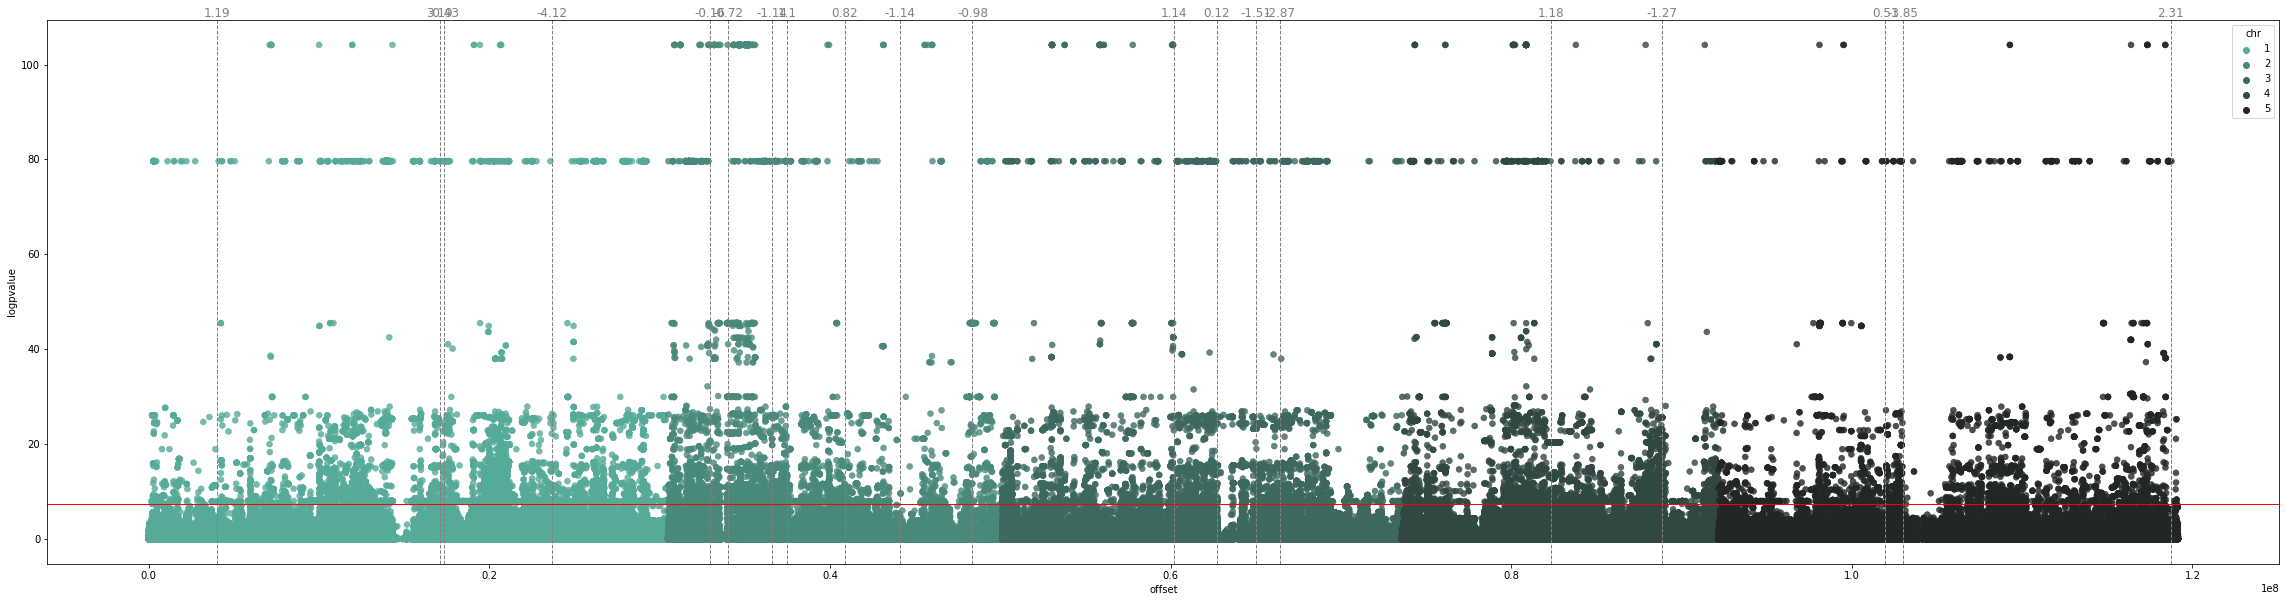

In [356]:
# Your GWAS scatterplot code with custom colors, alpha, vertical lines, and annotations
plt.figure(figsize=(40, 10))
sns.scatterplot(data=df_sample, x='offset', y='logpvalue', hue='chr', alpha=0.8, palette=custom_colors, edgecolor=None)

# Add vertical lines and annotations for each position in the list
for sc, pos in zip(causal_loci['sc'], causal_loci['offset']):
    plt.axvline(x=pos, color='grey', linestyle='--', linewidth=1)
    plt.text(pos, plt.ylim()[1], round(sc, 2), ha='center', va='bottom', color='grey', fontsize=12)

# Add a horizontal line for significance threshold
significance_threshold = -np.log10(5e-8)
plt.axhline(y=significance_threshold, color='red', linestyle='-', linewidth=1)

# Show the plot
plt.show()
#lowfrew

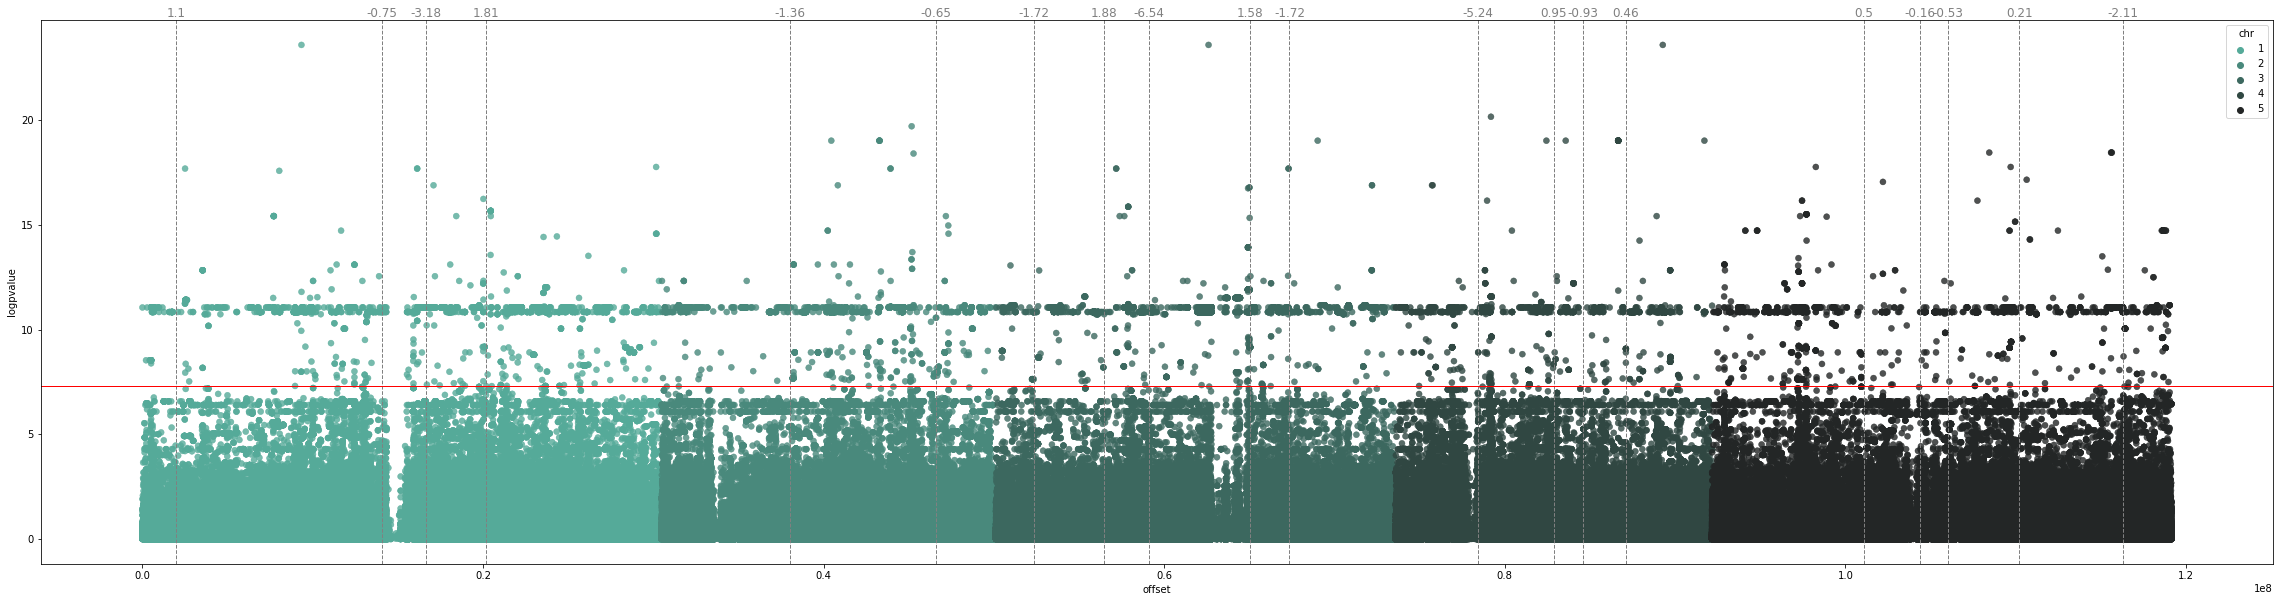

In [332]:
# Your GWAS scatterplot code with custom colors, alpha, vertical lines, and annotations
plt.figure(figsize=(40, 10))
sns.scatterplot(data=df_sample, x='offset', y='logpvalue', hue='chr', alpha=0.8, palette=custom_colors, edgecolor=None)

# Add vertical lines and annotations for each position in the list
for sc, pos in zip(causal_loci['sc'], causal_loci['offset']):
    plt.axvline(x=pos, color='grey', linestyle='--', linewidth=1)
    plt.text(pos, plt.ylim()[1], round(sc, 2), ha='center', va='bottom', color='grey', fontsize=12)

# Add a horizontal line for significance threshold
significance_threshold = -np.log10(5e-8)
plt.axhline(y=significance_threshold, color='red', linestyle='-', linewidth=1)

# Show the plot
plt.show()

##optima-22

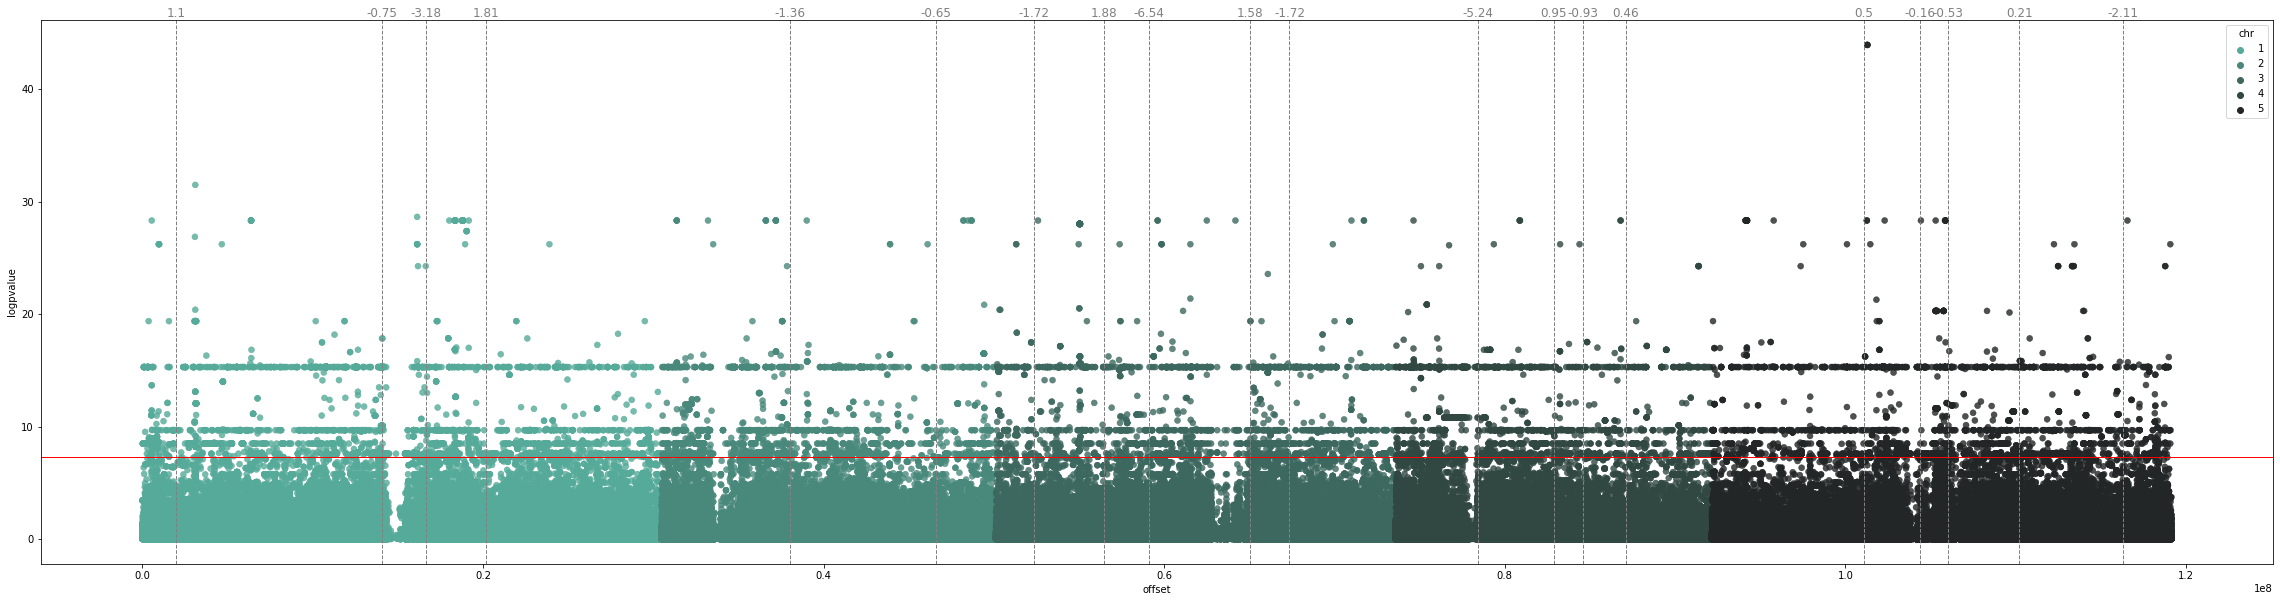

In [307]:
# Your GWAS scatterplot code with custom colors, alpha, vertical lines, and annotations
plt.figure(figsize=(40, 10))
sns.scatterplot(data=df_sample, x='offset', y='logpvalue', hue='chr', alpha=0.8, palette=custom_colors, edgecolor=None)

# Add vertical lines and annotations for each position in the list
for sc, pos in zip(causal_loci['sc'], causal_loci['offset']):
    plt.axvline(x=pos, color='grey', linestyle='--', linewidth=1)
    plt.text(pos, plt.ylim()[1], round(sc, 2), ha='center', va='bottom', color='grey', fontsize=12)

# Add a horizontal line for significance threshold
significance_threshold = -np.log10(5e-8)
plt.axhline(y=significance_threshold, color='red', linestyle='-', linewidth=1)

# Show the plot
plt.show()

##optima2

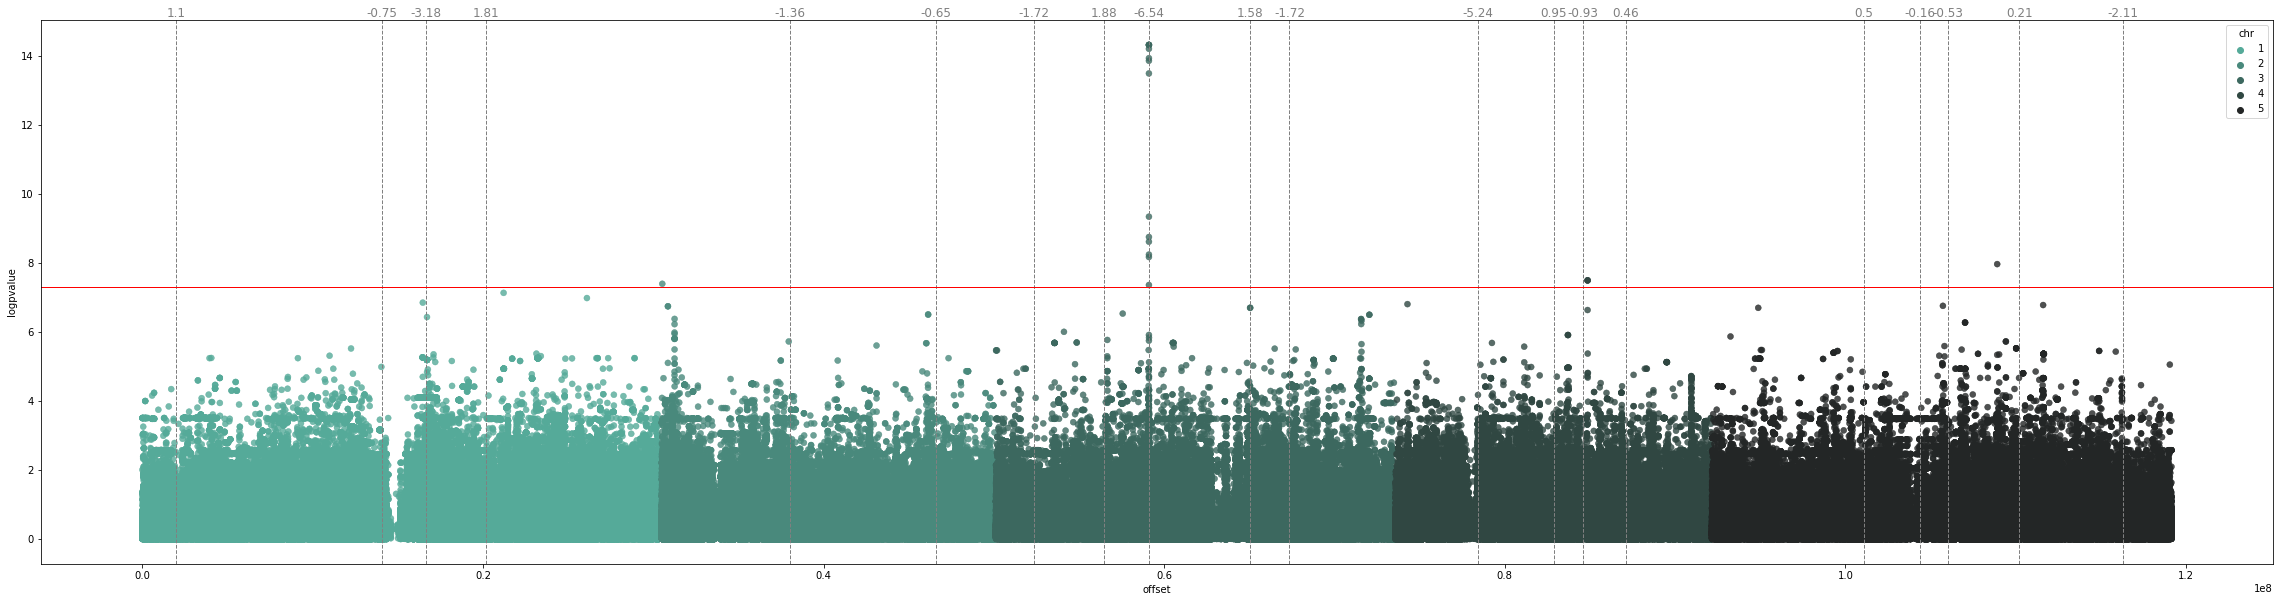

In [273]:

# Your GWAS scatterplot code with custom colors, alpha, vertical lines, and annotations
plt.figure(figsize=(40, 10))
sns.scatterplot(data=df_sample, x='offset', y='logpvalue', hue='chr', alpha=0.8, palette=custom_colors, edgecolor=None)

# Add vertical lines and annotations for each position in the list
for sc, pos in zip(causal_loci['sc'], causal_loci['offset']):
    plt.axvline(x=pos, color='grey', linestyle='--', linewidth=1)
    plt.text(pos, plt.ylim()[1], round(sc, 2), ha='center', va='bottom', color='grey', fontsize=12)

# Add a horizontal line for significance threshold
significance_threshold = -np.log10(5e-8)
plt.axhline(y=significance_threshold, color='red', linestyle='-', linewidth=1)

# Show the plot
plt.show()

## optima1

In [207]:
df_sample1 = df_sample[df_sample['chr']==1]

In [208]:
causal_loci1 = causal_loci[causal_loci['chr'] == 1]

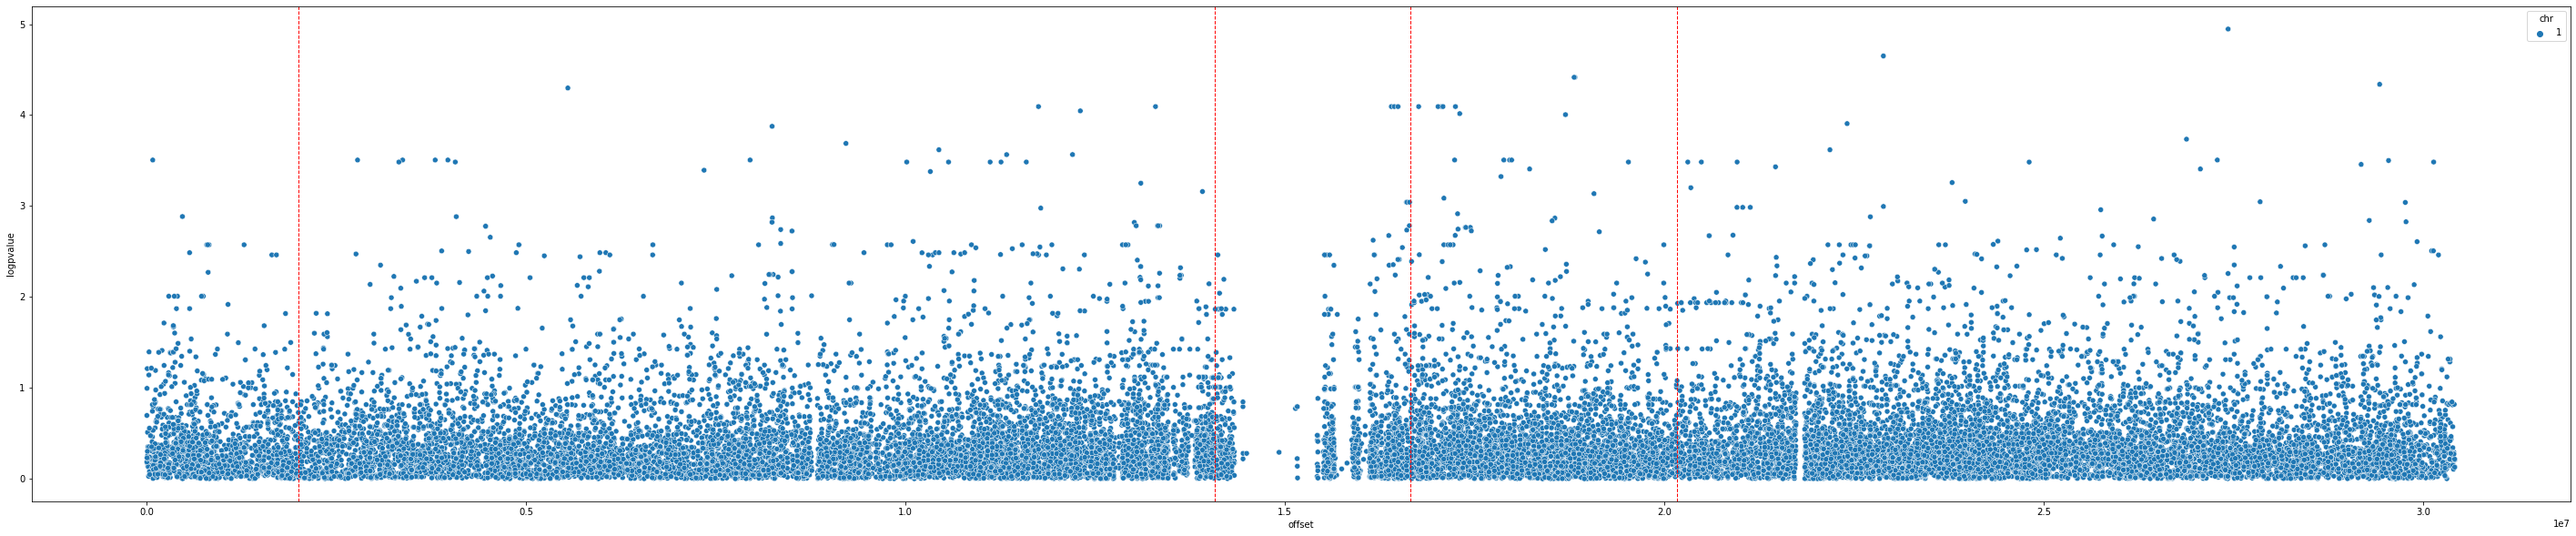

In [209]:
plt.figure(figsize=(50, 10))  # Width, height in inches

sns.scatterplot(data = df_sample1 , x = 'offset', y = 'logpvalue' , hue = 'chr')

# Add vertical lines for each position in the list
for pos in causal_loci1.offset:
    plt.axvline(x=pos, color='red', linestyle='--', linewidth=1)
